# PATTERN MINING

In [273]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from mlxtend.frequent_patterns import fpgrowth

In [274]:
train = pd.read_csv('pp_train.csv')
test = pd.read_csv('pp_test.csv') 
#df = pd.concat([train, test], axis=0, ignore_index=True) #abbiamo unito train e test
df = train

In [275]:
#df.info()

In [276]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'numRegions', 'userReviewsTotal', 'is_Documentary',
       'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show',
       'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical',
       'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV',
       'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy',
       'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama', 'is_Sport',
       'is_War', 'is_Horror', 'is_Animation', 'fill_runtimeMinutes',
       'is_from_Oceania', 'is_from_North America', 'is_from_South America',
       'is_from_Asia', 'is_from_Africa', 'is_from_Europe', 'countryOfOrigin',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS'

In [277]:
df = df[df["outlier_w_type"] != True]

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15835 entries, 0 to 16130
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   originalTitle                               15835 non-null  object 
 1   rating                                      15835 non-null  int64  
 2   startYear                                   15835 non-null  int64  
 3   endYear                                     15085 non-null  float64
 4   runtimeMinutes                              11251 non-null  float64
 5   awardWins                                   15835 non-null  float64
 6   numVotes                                    15835 non-null  int64  
 7   totalImages                                 15835 non-null  int64  
 8   totalVideos                                 15835 non-null  int64  
 9   totalCredits                                15835 non-null  int64  
 10  criticReviewsTo

## Gestione variabili 

### Osservare la distribuzione delle numeriche per binning

In [ ]:
# df['startYear'].describe()
#df['totalNominations'].describe()
#df['fill_runtimeMinutes_Bruno'].describe()
# df['totalMedia'].describe()
#df['numVotes'].describe()
# df['totalCredits'].describe()
# df['criticReviewsTotal'].describe()
# df['numRegions'].describe()
# df['userReviewsTotal'].describe()
# df['rating'].describe()

count     15835.000000
mean       1436.807010
std       19140.692605
min           5.000000
25%          15.000000
50%          36.000000
75%         149.000000
max      966565.000000
Name: numVotes, dtype: float64

### Trasformazione binaria con valori semanticamente significativi
#### episodes

In [280]:
df["canHaveEpisodes"] = df["canHaveEpisodes"].astype(int)
canhaveeps_dict = {0: "cant_have_episodes", 1: "can_have_episodes"}
df["canHaveEpisodes"] = df["canHaveEpisodes"].map(canhaveeps_dict)
df["canHaveEpisodes"]

C:\Users\Gagia\AppData\Local\Temp\ipykernel_11580\2497733362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["canHaveEpisodes"] = df["canHaveEpisodes"].astype(int)
C:\Users\Gagia\AppData\Local\Temp\ipykernel_11580\2497733362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["canHaveEpisodes"] = df["canHaveEpisodes"].map(canhaveeps_dict)


0        cant_have_episodes
1        cant_have_episodes
2         can_have_episodes
3         can_have_episodes
4        cant_have_episodes
                ...        
16126    cant_have_episodes
16127    cant_have_episodes
16128    cant_have_episodes
16129    cant_have_episodes
16130    cant_have_episodes
Name: canHaveEpisodes, Length: 15835, dtype: object

### Handling of numerical attributes
Delle seguenti variabili: 'rating', 'startYear', 'numVotes', 'totalCredits', 'criticReviewsTotal', 'numRegions', 'userReviewsTotal',
    'countryOfOrigin_freq_enc',
       'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryOfOrigin_AS',
       'countryOfOrigin_EU', 'countryOfOrigin_OC', 'countryOfOrigin_SA',
       'countryOfOrigin_UNK'
       'fill_runtimeMinutes_Bruno', 'totalNominations',
       'totalMedia'

In [281]:
df_copy = df.copy()

##### TotalNominations

In [282]:
# df_copy["log_totalNominations"] = np.log1p(df["totalNominations"])

In [283]:
# #TOTALNOMINATIONS LOG-TRANSFORMED
# log_bins = [-0.01, 0, np.log(5), np.log(20), df_copy['log_totalNominations'].max()]
# labels = ['ZeroNom', 'LowNom', 'MediumNom', 'VeryHighNom']

# df_copy['log_nom_bin_cut'] = pd.cut(df_copy['log_totalNominations'], 
#                                 bins=log_bins, 
#                                 labels=labels)

# print(df_copy.groupby('log_nom_bin_cut')['totalNominations'].describe())

In [284]:
#TOTALNOMINATIONS NON LOG-TRANSFORMED   
bins = [-1, 0, 2, 10, df_copy['totalNominations'].max()]
labels = ['ZeroNom', 'LowNom', 'MediumNom', 'VeryHighNom']

df_copy['totalNominations_bin'] = pd.cut(df_copy['totalNominations'], 
                                bins=bins, 
                                labels=labels)

print(df_copy.groupby('totalNominations_bin')['totalNominations'].describe())

                        count       mean        std   min   25%   50%   75%  \
totalNominations_bin                                                          
ZeroNom               13177.0   0.000000   0.000000   0.0   0.0   0.0   0.0   
LowNom                 1477.0   1.335816   0.472435   1.0   1.0   1.0   2.0   
MediumNom               874.0   5.099542   2.054342   3.0   3.0   4.0   6.0   
VeryHighNom             307.0  29.231270  32.890320  11.0  13.0  17.0  29.0   

                        max  
totalNominations_bin         
ZeroNom                 0.0  
LowNom                  2.0  
MediumNom              10.0  
VeryHighNom           306.0  


##### TotalMedia

In [285]:
# df_copy["log_totalMedia"] = np.log1p(df["totalMedia"])

In [286]:
#TOTALMEDIA NON LOG-TRANSFORMED
bins = [-1, 0, 1, 8, 50, df_copy['totalMedia'].max()]
labels = ['ZeroMedia', 'LowMedia', 'MediumMedia', 'HighMedia', 'VeryHighMedia']
df_copy['media_bin'] = pd.cut(df_copy['totalMedia'], bins=bins, labels=labels)

print(df_copy.groupby('media_bin')['totalMedia'].describe())

                count        mean         std   min   25%   50%    75%     max
media_bin                                                                     
ZeroMedia      3167.0    0.000000    0.000000   0.0   0.0   0.0    0.0     0.0
LowMedia       4607.0    1.000000    0.000000   1.0   1.0   1.0    1.0     1.0
MediumMedia    4940.0    3.861134    1.920507   2.0   2.0   3.0    5.0     8.0
HighMedia      2455.0   19.383299   10.381405   9.0  11.0  16.0   25.0    50.0
VeryHighMedia   666.0  173.623123  328.760704  51.0  67.0  90.0  145.0  3516.0


In [287]:
# #TOTALMEDIA LOG-TRANSFORMED
# log_bins = [-1, 0, 1.61, 3.1, 4.0, np.log(df_copy['totalMedia'].max())]
# labels = ['ZeroMedia', 'LowMedia', 'MediumMedia', 'HighMedia', 'VeryHighMedia']
# df_copy['log_media_bin'] = pd.cut(df_copy['totalMedia'], bins=log_bins, labels=labels)

# print(df_copy.groupby('log_media_bin')['totalMedia'].describe())

##### fill_runtimeMinutes_Bruno

In [288]:
# df_copy["log_fill_runtimeMinutes_Bruno"] = np.log1p(df["fill_runtimeMinutes_Bruno"])

In [289]:
#FILL_RUNTIMEMINS_BRUNO NON LOG-TRANSFORMED
bins = [0, 30, 60, 90, df_copy['fill_runtimeMinutes_Bruno'].max()]
labels = ['VeryLowRuntime', 'LowRuntime', 'MediumRuntime', 'HighRuntime']

df_copy['runtime_bin'] = pd.cut(df_copy['fill_runtimeMinutes_Bruno'], bins=bins, labels=labels)
print(df_copy.groupby('runtime_bin')['fill_runtimeMinutes_Bruno'].describe())

                 count        mean        std   min   25%    50%    75%    max
runtime_bin                                                                   
VeryLowRuntime  5486.0   20.228582   8.803987   3.0  12.0   23.0   30.0   30.0
LowRuntime      3683.0   48.884605   7.397754  31.0  43.0   47.0   55.5   60.0
MediumRuntime   3559.0   81.906434   7.984489  61.0  77.0   85.0   89.0   90.0
HighRuntime     3107.0  106.042807  16.336640  91.0  95.0  100.0  111.0  170.0


In [290]:
# #FILL_RUNTIMEMINS_BRUNO LOG-TRANSFORMED
# bins = [-np.inf, 2.0, 3.5, 4.5, 5.5, np.inf]
# labels = ['VeryLowRuntime', 'LowRuntime', 'MediumRuntime', 'HighRuntime', 'VeryHighRuntime']

# df_copy['log_runtime_bin'] = pd.cut(
#     df_copy['log_fill_runtimeMinutes_Bruno'],
#     bins=bins,
#     labels=labels,
#     ordered=True)

# print(df_copy.groupby('log_runtime_bin')['fill_runtimeMinutes_Bruno'].describe())

##### rating

In [291]:
#RATING 
bins = [-1, 3, 6, 7, 8, df_copy['rating'].max()]
labels = ['VeryLowRating', 'LowRating', 'MediumRating', 'HighRating', "VeryHighRating"]
df_copy['rating_bin'] = pd.cut(df_copy['rating'], bins=bins, labels=labels)

print(df_copy['rating_bin'].value_counts())
print(df_copy.groupby('rating_bin')['rating'].describe())

rating_bin
HighRating        4649
MediumRating      4407
LowRating         4227
VeryHighRating    2336
VeryLowRating      216
Name: count, dtype: int64
                 count      mean       std  min  25%  50%  75%   max
rating_bin                                                          
VeryLowRating    216.0  2.675926  0.516314  1.0  2.0  3.0  3.0   3.0
LowRating       4227.0  5.526851  0.680278  4.0  5.0  6.0  6.0   6.0
MediumRating    4407.0  7.000000  0.000000  7.0  7.0  7.0  7.0   7.0
HighRating      4649.0  8.000000  0.000000  8.0  8.0  8.0  8.0   8.0
VeryHighRating  2336.0  9.143836  0.350998  9.0  9.0  9.0  9.0  10.0


##### numVotes   >>> max è sgravato

In [292]:
# df_copy["log_numVotes"] = np.log1p(df["numVotes"])

In [293]:
# #NUMVOTES LOG-TRANSFORMED
# bins = [-np.inf, 2.7, 3.9, 5.0, 8.0, np.inf]
# labels = ['VeryLowVotes', 'LowVotes', 'MediumVotes', 'HighVotes', 'VeryHighVotes']

# # Applicazione
# df_copy['log_numvotes_bin'] = pd.cut(
#     df_copy['log_numVotes'],
#     bins=bins,
#     labels=labels
# )

# print(df_copy.groupby('log_numvotes_bin')['numVotes'].describe())

In [294]:
#NUMVOTES NON LOG-TRANSFORMED
labels = ['VeryLowVotes', 'LowVotes', 'MediumVotes', 'HighVotes', 'VeryHighVotes']
bins = [4, 15, 50, 150, 1000, float('inf')]  # include il min=5 e max=1.071.372

df_copy['numVotes_bin'] = pd.cut(df['numVotes'], bins=bins, labels=labels, include_lowest=True)
print(df_copy.groupby('numVotes_bin')['numVotes'].describe())

                count          mean           std     min      25%     50%  \
numVotes_bin                                                                 
VeryLowVotes   4245.0     10.015077      2.894510     5.0     8.00    10.0   
LowVotes       4758.0     28.292140      9.617380    16.0    20.00    26.0   
MediumVotes    2895.0     90.075648     27.659511    51.0    66.00    85.0   
HighVotes      2755.0    394.178221    221.811792   151.0   214.00   324.0   
VeryHighVotes  1182.0  17959.374788  67943.642291  1001.0  1544.25  2793.0   

                   75%       max  
numVotes_bin                      
VeryLowVotes     12.00      15.0  
LowVotes         35.00      50.0  
MediumVotes     111.00     150.0  
HighVotes       523.00     997.0  
VeryHighVotes  6395.75  966565.0  


##### StartYear

In [295]:
#STARTYEAR
bins =[
    1878,  # Cinema delle origini e muto
    1930,  # Cinema sonoro classico e radio
    1955,  # TV B/N e colore, cinema widescreen
    1980,  # Video domestico e media transazionali
    2000,  # DVD, internet e mobile
    2015,  # Streaming integrato e nuovi media
    df_copy['startYear'].max()] #era corrente
labels = ['pre-1930', '1930-1954', '1955-1979', '1980-1999', '2000-2019', 'post-2020']
df_copy['startYear_bin'] = pd.cut(df_copy['startYear'], bins=bins, labels=labels)

print(df_copy.groupby('startYear_bin')['startYear'].describe())

                count         mean        std     min     25%     50%     75%  \
startYear_bin                                                                   
pre-1930        470.0  1916.208511  10.673040  1894.0  1909.0  1918.0  1926.0   
1930-1954      1045.0  1943.941627   7.456736  1931.0  1937.0  1944.0  1951.0   
1955-1979      2902.0  1969.411440   6.916470  1956.0  1964.0  1970.0  1975.0   
1980-1999      4306.0  1991.333953   5.386475  1981.0  1987.0  1992.0  1996.0   
2000-2019      3981.0  2008.988948   4.125528  2001.0  2006.0  2009.0  2012.0   
post-2020      3130.0  2019.530990   2.390557  2016.0  2017.0  2019.0  2022.0   

                  max  
startYear_bin          
pre-1930       1930.0  
1930-1954      1955.0  
1955-1979      1980.0  
1980-1999      1999.0  
2000-2019      2015.0  
post-2020      2024.0  


##### totalCredits

In [296]:
# df_copy["log_totalCredits"] = np.log1p(df["totalCredits"])

In [297]:
# #TOTALCREDITS LOG-TRANSFORMED
# bins = [-np.inf, 2.0, 3.0, 4.2, 6.0, np.inf]
# labels = ['VeryLowCredits', 'LowCredits', 'MediumCredits', 'HighCredits', 'VeryHighCredits']

# df_copy['log_totalCredits_bin'] = pd.cut(df_copy['log_totalCredits'], bins=bins, labels=labels)

In [298]:
# print(df_copy.groupby('log_totalCredits_bin')['totalCredits'].describe())

In [299]:
#TOTALCREDITS NON LOG-TRANSFORMED
labels = ['VeryLowCredits', 'LowCredits', 'MediumCredits', 'HighCredits', 'VeryHighCredits']
bins = [-1, 15, 35, 65, 200, float('inf')]

df_copy['totalCredits_bin'] = pd.cut(df['totalCredits'], bins=bins, labels=labels, include_lowest=True)

In [300]:
print(df_copy.groupby('totalCredits_bin')['totalCredits'].describe())

                   count        mean         std    min    25%    50%    75%  \
totalCredits_bin                                                               
VeryLowCredits    3668.0    8.383860    4.285984    0.0    5.0    9.0   12.0   
LowCredits        4337.0   24.867189    5.740336   16.0   20.0   25.0   30.0   
MediumCredits     3842.0   48.485424    8.376578   36.0   41.0   48.0   55.0   
HighCredits       3292.0  107.223876   35.110417   66.0   78.0   98.0  130.0   
VeryHighCredits    696.0  440.159483  724.402767  201.0  234.0  287.5  418.0   

                      max  
totalCredits_bin           
VeryLowCredits       15.0  
LowCredits           35.0  
MediumCredits        65.0  
HighCredits         200.0  
VeryHighCredits   15742.0  


##### criticReviewsTotal

In [301]:
# df_copy["log_criticReviewsTotal"] = np.log1p(df["criticReviewsTotal"])

In [302]:
# #CRITICREVIEWS LOG-TRANSFORMED
# bins = [-0.01, 0.0, 1.4, 2.3, 3.4, 4.6, np.inf]
# labels = [
#     'NoCriticReviews',
#     'FewCriticReviews',
#     'ModerateCriticReviews',
#     'ManyCriticReviews',
#     'VeryHighCriticReviews',
#     'ExtensiveCriticReviews'
# ]

# df_copy['log_criticReviewsTotal_bin'] = pd.cut(
#     df_copy['log_criticReviewsTotal'],
#     bins=bins,
#     labels=labels
# )

In [303]:
# print(df_copy.groupby('log_criticReviewsTotal_bin')['criticReviewsTotal'].describe())

In [304]:
#CRITICREVIEWS NON LOG-TRANSFORMED
labels = [
    'NoCriticReviews',
    'FewCriticReviews',
    'ModerateCriticReviews',
    'ManyCriticReviews',
    'VeryHighCriticReviews',
    'ExtensiveCriticReviews'
]
bins = [-1, 0, 1, 5, 20, 45, float('inf')]

df_copy['criticReviewsTotal_bin'] = pd.cut(df['criticReviewsTotal'], bins=bins, labels=labels, include_lowest=True)
print(df_copy.groupby('criticReviewsTotal_bin')['criticReviewsTotal'].describe())

                          count        mean        std   min   25%   50%  \
criticReviewsTotal_bin                                                     
NoCriticReviews         10985.0    0.000000   0.000000   0.0   0.0   0.0   
FewCriticReviews         1858.0    1.000000   0.000000   1.0   1.0   1.0   
ModerateCriticReviews    1665.0    2.974775   1.063190   2.0   2.0   3.0   
ManyCriticReviews         889.0   10.268841   3.909844   6.0   7.0   9.0   
VeryHighCriticReviews     235.0   29.676596   6.809816  21.0  24.0  28.0   
ExtensiveCriticReviews    203.0  106.783251  79.406538  46.0  56.0  78.0   

                          75%    max  
criticReviewsTotal_bin                
NoCriticReviews           0.0    0.0  
FewCriticReviews          1.0    1.0  
ModerateCriticReviews     4.0    5.0  
ManyCriticReviews        13.0   20.0  
VeryHighCriticReviews    35.0   45.0  
ExtensiveCriticReviews  122.5  533.0  


##### numRegions

In [305]:
# df_copy["log_numRegions"] = np.log1p(df["numRegions"])

In [306]:
# #NUMREGIONS LOG-TRANSFORMED
# bins = [-np.inf, 1.2, 2.0, 3.2, np.inf]
# labels = ['VeryFewRegions', 'ModerateRegions', 'ManyRegions', 'GlobalRegions']

# # Applicazione
# df_copy['log_numRegions_bin'] = pd.cut(
#     df_copy['log_numRegions'],
#     bins=bins,
#     labels=labels
# )

In [307]:
# print(df_copy.groupby('log_numRegions_bin')['numRegions'].describe())

In [308]:
#NUMREGIONS NON LOG-TRANSFORMED
labels = ['VeryFewRegions', 'ModerateRegions', 'ManyRegions', 'GlobalRegions']
bins = [0, 1, 3, 8, float('inf')]

df_copy['numRegions_bin'] = pd.cut(df['numRegions'], bins=bins, labels=labels, include_lowest=True)
print(df_copy.groupby('numRegions_bin')['numRegions'].describe())


                  count       mean       std  min   25%   50%   75%   max
numRegions_bin                                                           
VeryFewRegions   9221.0   1.000000  0.000000  1.0   1.0   1.0   1.0   1.0
ModerateRegions  2653.0   2.318884  0.466132  2.0   2.0   2.0   3.0   3.0
ManyRegions      2468.0   5.702188  1.361660  4.0   4.0   6.0   7.0   8.0
GlobalRegions    1493.0  18.230409  9.805711  9.0  11.0  15.0  22.0  62.0


##### userReviewsTotal

In [309]:
# df_copy["log_userReviewsTotal"] = np.log1p(df["userReviewsTotal"])

In [310]:
# #USERREVIEWSTOTAL LOG-TRANSFORMED
# bins = [-0.01, 0.0, 2.8, 5.0, np.inf]
# labels = ['NoUserReviews', 'FewUserReviews', 'ManyUserReviews', 'VeryManyUserReviews']

# # Applicazione
# df_copy['log_userReviewsTotal_bin'] = pd.cut(
#     df_copy['log_userReviewsTotal'],
#     bins=bins,
#     labels=labels)

In [311]:
# print(df_copy.groupby('log_userReviewsTotal_bin')['userReviewsTotal'].describe())

In [312]:
#USERREVIEWSTOTAL NON LOG-TRANSFORMED
labels = ['NoUserReviews', 'FewUserReviews', 'ManyUserReviews', 'VeryManyUserReviews']
bins = [-1, 0, 3, 30, float('inf')]

df_copy['userReviewsTotal_bin'] = pd.cut(df['userReviewsTotal'], bins=bins, labels=labels, include_lowest=True)

In [313]:
print(df_copy.groupby('userReviewsTotal_bin')['userReviewsTotal'].describe())

                       count        mean         std   min   25%   50%    75%  \
userReviewsTotal_bin                                                            
NoUserReviews         8893.0    0.000000    0.000000   0.0   0.0   0.0    0.0   
FewUserReviews        4114.0    1.566116    0.738065   1.0   1.0   1.0    2.0   
ManyUserReviews       2291.0   10.115234    6.617681   4.0   5.0   8.0   13.0   
VeryManyUserReviews    537.0  156.096834  320.647767  31.0  43.0  67.0  145.0   

                         max  
userReviewsTotal_bin          
NoUserReviews            0.0  
FewUserReviews           3.0  
ManyUserReviews         30.0  
VeryManyUserReviews   5727.0  


##### countryOfOrigin_freqenc

In [335]:
df_copy["countryOfOrigin_freq_enc"].describe()

count    15835.000000
mean         0.194401
std          0.182575
min          0.000056
25%          0.018089
50%          0.098792
75%          0.397061
max          0.658429
Name: countryOfOrigin_freq_enc, dtype: float64

In [315]:
bins = [-0.01, 0.03, 0.3, 1.0]
labels = ['LowFreqCountries', 'MediumFreqCountries', 'HighFreqCountries']

df_copy["country_freq_bin"] = pd.cut(
    df_copy["countryOfOrigin_freq_enc"],
    bins=bins,
    labels=labels
)

In [316]:
print(df_copy.groupby('country_freq_bin')['countryOfOrigin_freq_enc'].describe())

                      count      mean       std       min       25%       50%  \
country_freq_bin                                                                
LowFreqCountries     4811.0  0.011205  0.007740  0.000056  0.005510  0.009406   
MediumFreqCountries  4147.0  0.065466  0.029856  0.030556  0.036233  0.047086   
HighFreqCountries    6877.0  0.400311  0.016378  0.397061  0.397061  0.397061   

                          75%       max  
country_freq_bin                         
LowFreqCountries     0.017532  0.029888  
MediumFreqCountries  0.098792  0.204931  
HighFreqCountries    0.397061  0.658429  


### Handling of categorical attributes

##### countryOfOrigin

In [317]:
# # BINARIZZAZIONE -  ONE HOT ENCODING 
# df_copy['from_Europe_bin'] = (df_copy['countryOfOrigin_EU'] > 0).astype(int)
# df_copy['from_NorthAmerica_bin'] = (df_copy['countryOfOrigin_NA'] > 0).astype(int)
# df_copy['from_SouthAmerica_bin'] = (df_copy['countryOfOrigin_SA'] > 0).astype(int)
# df_copy['from_Asia_bin'] = (df_copy['countryOfOrigin_SA'] > 0).astype(int)
# df_copy['from_Oceania_bin'] = (df_copy['countryOfOrigin_OC'] > 0).astype(int)
# df_copy['from_Africa_bin'] = (df_copy['countryOfOrigin_AF'] > 0).astype(int)
# df_copy['from_Unknown_bin'] = (df_copy['countryOfOrigin_UNK'] > 0).astype(int)


In [318]:
# BINARIZZAZIONE 
def discretize_continent_count(df, col_name, cont):
    new_col = f'{cont }_bin'
    
    def label(value):
        if value == 0:
            return f'not_{cont}'
       # elif value == 1:
        #    return f'one_{cont}'
        else:
            return f'is_{cont}'
    
    df[new_col] = df[col_name].apply(label)

# applico funzione
discretize_continent_count(df_copy, "countryOfOrigin_NA", "from_NorthAmerica")
discretize_continent_count(df_copy, "countryOfOrigin_EU", "from_Europe")
discretize_continent_count(df_copy, "countryOfOrigin_SA", "from_SouthAmerica")
discretize_continent_count(df_copy, "countryOfOrigin_AS", "from_Asia")
discretize_continent_count(df_copy, "countryOfOrigin_OC", "from_Oceania")
discretize_continent_count(df_copy, "countryOfOrigin_AF", "from_Africa")
discretize_continent_count(df_copy, "countryOfOrigin_UNK", "from_Unknown")

In [319]:
df_copy.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,numRegions_bin,userReviewsTotal_bin,country_freq_bin,from_NorthAmerica_bin,from_Europe_bin,from_SouthAmerica_bin,from_Asia_bin,from_Oceania_bin,from_Africa_bin,from_Unknown_bin
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,1995.0,NaN,0.0,779,1,0,21,...,VeryFewRegions,NoUserReviews,HighFreqCountries,is_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
1,Idealnaya para,6,1992,1992.0,NaN,0.0,38,1,0,24,...,VeryFewRegions,FewUserReviews,LowFreqCountries,not_from_NorthAmerica,is_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
2,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,22,0,56,...,VeryFewRegions,NoUserReviews,LowFreqCountries,is_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
3,Seutateueob,8,2020,2020.0,80.0,1.0,15718,347,2,47,...,GlobalRegions,VeryManyUserReviews,LowFreqCountries,not_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,is_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
4,Lightdance,9,1995,1995.0,34.0,0.0,14,1,0,0,...,VeryFewRegions,FewUserReviews,HighFreqCountries,is_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown


## Pattern Mining

### Transactions Creation

In [320]:
df_copy.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'numRegions', 'userReviewsTotal', 'is_Documentary',
       'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show',
       'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical',
       'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV',
       'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy',
       'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama', 'is_Sport',
       'is_War', 'is_Horror', 'is_Animation', 'fill_runtimeMinutes',
       'is_from_Oceania', 'is_from_North America', 'is_from_South America',
       'is_from_Asia', 'is_from_Africa', 'is_from_Europe', 'countryOfOrigin',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS'

In [321]:
cols = [
        #"canHaveEpisodes", 
        #"isAdult",
        #"totalNominations_bin", 
        #"media_bin",
        "rating_bin", "runtime_bin", "numVotes_bin", 
        #"startYear_bin",
        "totalCredits_bin", 
        "criticReviewsTotal_bin", 
        # "country_freq_bin",
        # "numRegions_bin", 
        "userReviewsTotal_bin",
        "titleType",
        'from_NorthAmerica_bin','from_Europe_bin' , 'from_SouthAmerica_bin', 'from_Asia_bin', 'from_Oceania_bin', 'from_Africa_bin', 
        #'from_Unknown_bin'
]


# #FUNZIONANTI COME BASE
#     #     "canHaveEpisodes", "isAdult",
#     #     "totalNominations_bin", "media_bin"
#           "rating_bin", "runtime_bin", "numVotes_bin", "startYear_bin",
#     #     "totalCredits_bin", "criticReviewsTotal_bin", "numRegions_bin", "userReviewsTotal_bin"
#           "titleType",
#           'from_NorthAmerica_bin', 'from_Europe_bin' ,'from_SouthAmerica_bin', 'from_Asia_bin', 'from_Oceania_bin', 'from_Africa_bin', 'from_Unknown_bin'

#TUTTE
    #     "canHaveEpisodes", "isAdult",
    #     "totalNominations_bin", "media_bin"
    #     "rating_bin", "runtime_bin", "numVotes_bin", "startYear_bin",
    #     "totalCredits_bin", "criticReviewsTotal_bin", "numRegions_bin", "userReviewsTotal_bin"
    #     "titleType",
    #      'from_NorthAmerica_bin', 'from_Europe_bin' ,'from_SouthAmerica_bin', 'from_Asia_bin', 'from_Oceania_bin', 'from_Africa_bin', 'from_Unknown_bin'




In [322]:
transactions = []

for index, row in df_copy[cols].iterrows():
    transaction = []
    for col in cols:
        value = str(row[col])
        if not value.startswith('not_'):  # Ignora 'none_from_*'
            transaction.append(value)
    transactions.append(transaction)

# Verifica risultato
print(len(transactions))
print(transactions[10:15])


15835
[['VeryHighRating', 'LowRuntime', 'VeryLowVotes', 'HighCredits', 'NoCriticReviews', 'NoUserReviews', 'tvSpecial', 'is_from_NorthAmerica'], ['MediumRating', 'LowRuntime', 'LowVotes', 'MediumCredits', 'NoCriticReviews', 'NoUserReviews', 'movie'], ['VeryLowRating', 'MediumRuntime', 'HighVotes', 'HighCredits', 'FewCriticReviews', 'ManyUserReviews', 'movie', 'is_from_NorthAmerica'], ['MediumRating', 'MediumRuntime', 'HighVotes', 'HighCredits', 'FewCriticReviews', 'FewUserReviews', 'movie', 'is_from_Europe'], ['VeryHighRating', 'VeryLowRuntime', 'VeryHighVotes', 'HighCredits', 'ModerateCriticReviews', 'ManyUserReviews', 'tvEpisode', 'is_from_NorthAmerica']]


In [323]:
# Let's utilize TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_apriori = pd.DataFrame(te_array, columns=te.columns_)

# Visualizza le prime righe per assicurarti che la trasformazione sia corretta
print(df_apriori.head())

   ExtensiveCriticReviews  FewCriticReviews  FewUserReviews  HighCredits  \
0                   False              True           False        False   
1                   False             False            True        False   
2                   False             False           False        False   
3                   False             False           False        False   
4                   False             False            True        False   

   HighRating  HighRuntime  HighVotes  LowCredits  LowRating  LowRuntime  ...  \
0        True        False       True        True      False       False  ...   
1       False         True      False        True       True       False  ...   
2       False        False      False       False       True       False  ...   
3        True        False      False       False      False       False  ...   
4       False        False      False       False      False        True  ...   

   is_from_Oceania  is_from_SouthAmerica  movie  short  

### Confronto itemset per support

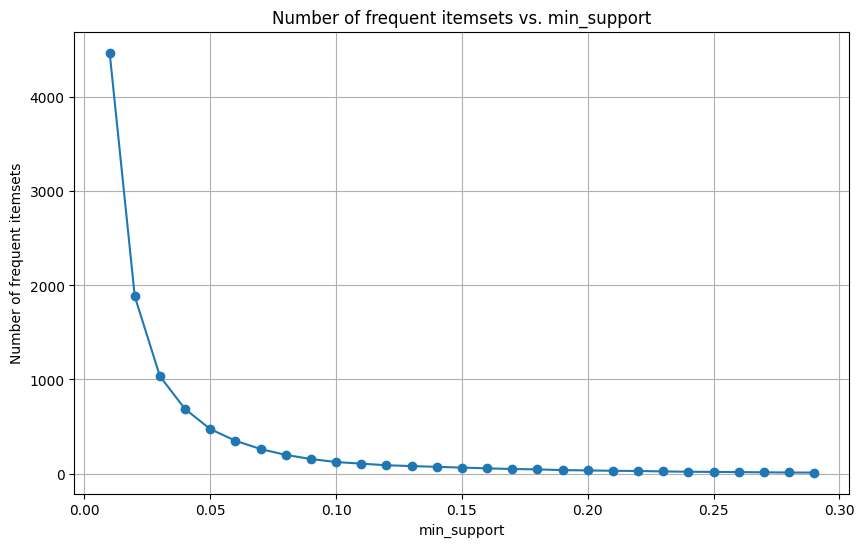

In [324]:
# Genera una lista di min_sup da testare
min_sups = [round(x, 2) for x in list(np.arange(0.01, 0.3, 0.01))]

# Lista per salvare il numero di itemset per ciascun supporto
num_itemsets = []

# Calcolo degli itemset frequenti per ogni min_sup
for min_sup in min_sups:
    frequent_itemsets = apriori(df_apriori, min_support=min_sup, use_colnames=True)
    num_itemsets.append(len(frequent_itemsets))

# Plot
plt.figure(figsize=(10,6))
plt.plot(min_sups, num_itemsets, marker='o')
plt.title('Number of frequent itemsets vs. min_support')
plt.xlabel('min_support')
plt.ylabel('Number of frequent itemsets')
plt.grid(True)
plt.show()


### Apriori

In [325]:
min_support = 0.08  # % supporto minimo
min_confidence = 0.6  # 60% confidenza minima --> serve dopo nella fase di rules extraction

# Apriori
frequent_itemsets_apriori = apriori(df_apriori, min_support=min_support, use_colnames=True)

# FRA -< Filtra gli itemset con almeno 2 item (lunghezza >= 2)
    #frequent_itemsets_apriori = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x) >= 2)]
    #frequent_itemsets_apriori.reset_index(drop=True, inplace=True)

print(frequent_itemsets_apriori.info())
print(frequent_itemsets_apriori.head(51))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   199 non-null    float64
 1   itemsets  199 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.2+ KB
None
     support                                itemsets
0   0.117335                      (FewCriticReviews)
1   0.259804                        (FewUserReviews)
2   0.207894                           (HighCredits)
3   0.293590                            (HighRating)
4   0.196211                           (HighRuntime)
5   0.173982                             (HighVotes)
6   0.273887                            (LowCredits)
7   0.266940                             (LowRating)
8   0.232586                            (LowRuntime)
9   0.300474                              (LowVotes)
10  0.144680                       (ManyUserReviews)
11  0.242627                         (MediumCre

### maximal itemset

In [326]:
# Find maximal itemsets (those that are not subsets of any other itemsets)
maximal_itemsets_apriori = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].apply(lambda x: not any(x < y for y in frequent_itemsets_apriori['itemsets']))]

# Display the results
print(maximal_itemsets_apriori.info())
print(maximal_itemsets_apriori.head(15))

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 198
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   90 non-null     float64
 1   itemsets  90 non-null     object 
dtypes: float64(1), object(1)
memory usage: 2.1+ KB
None
     support                             itemsets
0   0.117335                   (FewCriticReviews)
15  0.105147              (ModerateCriticReviews)
28  0.085380                           (tvSeries)
29  0.082791         (FewUserReviews, HighRating)
30  0.080770           (FewUserReviews, LowVotes)
32  0.091190     (FewUserReviews, VeryLowRuntime)
33  0.082160     (is_from_Europe, FewUserReviews)
35  0.091759              (FewUserReviews, movie)
36  0.110957       (HighCredits, NoCriticReviews)
37  0.086959         (HighCredits, NoUserReviews)
38  0.124471  (HighCredits, is_from_NorthAmerica)
39  0.089675             (HighCredits, tvEpisode)
40  0.095422             (HighRating, L

### Association Rules

In [327]:
#Apriori
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=min_confidence)
rules_apriori.info()
rules_apriori.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         137 non-null    object 
 1   consequents         137 non-null    object 
 2   antecedent support  137 non-null    float64
 3   consequent support  137 non-null    float64
 4   support             137 non-null    float64
 5   confidence          137 non-null    float64
 6   lift                137 non-null    float64
 7   representativity    137 non-null    float64
 8   leverage            137 non-null    float64
 9   conviction          137 non-null    float64
 10  zhangs_metric       137 non-null    float64
 11  jaccard             137 non-null    float64
 12  certainty           137 non-null    float64
 13  kulczynski          137 non-null    float64
dtypes: float64(12), object(2)
memory usage: 15.1+ KB


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(FewUserReviews),(NoCriticReviews),0.259804,0.693716,0.165835,0.638308,0.920128,1.0,-0.014395,0.846808,-0.104963,0.210535,-0.180905,0.438681
1,(HighRating),(NoCriticReviews),0.293590,0.693716,0.209346,0.713057,1.027879,1.0,0.005678,1.067400,0.038395,0.269097,0.063144,0.507416
2,(HighRuntime),(movie),0.196211,0.346763,0.167793,0.855166,2.466135,1.0,0.099754,4.510235,0.739631,0.447231,0.778282,0.669524
3,(LowCredits),(NoCriticReviews),0.273887,0.693716,0.207515,0.757667,1.092185,1.0,0.017515,1.263893,0.116241,0.273014,0.208794,0.528401
4,(LowCredits),(NoUserReviews),0.273887,0.561604,0.171392,0.625778,1.114269,1.0,0.017576,1.171487,0.141233,0.258083,0.146384,0.465481
5,(LowRating),(NoCriticReviews),0.266940,0.693716,0.174361,0.653182,0.941569,1.0,-0.010820,0.883125,-0.078048,0.221749,-0.132343,0.452262
6,(LowRuntime),(NoCriticReviews),0.232586,0.693716,0.180044,0.774097,1.115870,1.0,0.018695,1.355820,0.135309,0.241263,0.262439,0.516816
7,(LowRuntime),(NoUserReviews),0.232586,0.561604,0.143795,0.618246,1.100857,1.0,0.013174,1.148373,0.119384,0.221089,0.129203,0.437145
8,(LowVotes),(NoCriticReviews),0.300474,0.693716,0.252921,0.841740,1.213378,1.0,0.044477,1.935322,0.251391,0.341200,0.483290,0.603164
9,(LowVotes),(NoUserReviews),0.300474,0.561604,0.213956,0.712064,1.267911,1.0,0.045209,1.522546,0.302063,0.330118,0.343205,0.546519


### Scelta valori confidence

In [328]:
from mlxtend.frequent_patterns import association_rules

conf_values = [0.4, 0.5, 0.6, 0.7]
for c in conf_values:
    rules = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=c)
    print(f"min_confidence={c}: {len(rules)} regole trovate, lift medio = {rules['lift'].mean():.2f}")


min_confidence=0.4: 292 regole trovate, lift medio = 1.43
min_confidence=0.5: 194 regole trovate, lift medio = 1.41
min_confidence=0.6: 137 regole trovate, lift medio = 1.41
min_confidence=0.7: 98 regole trovate, lift medio = 1.46


In [329]:
rules_apriori.sort_values(by="lift", axis=0, ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
115,"(VeryLowRuntime, VeryLowCredits)",(short),0.113735,0.149542,0.081907,0.720155,4.815736,1.0,0.064899,3.039037,0.894030,0.451602,0.670948,0.633938
129,"(NoUserReviews, short)","(VeryLowRuntime, NoCriticReviews)",0.095422,0.281655,0.082728,0.866976,3.078152,1.0,0.055852,5.400099,0.746347,0.281056,0.814818,0.580349
128,"(short, NoCriticReviews)","(NoUserReviews, VeryLowRuntime)",0.123524,0.221345,0.082728,0.669734,3.025746,1.0,0.055387,2.357661,0.763858,0.315587,0.575851,0.521743
100,(short),"(NoCriticReviews, VeryLowRuntime)",0.149542,0.281655,0.118724,0.793919,2.818768,1.0,0.076605,3.485742,0.758691,0.379951,0.713117,0.607722
114,"(short, VeryLowCredits)",(VeryLowRuntime),0.085128,0.346448,0.081907,0.962166,2.777233,1.0,0.052415,17.274283,0.699474,0.234242,0.942110,0.599293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,(MediumVotes),(NoCriticReviews),0.182823,0.693716,0.121124,0.662522,0.955032,1.0,-0.005703,0.907565,-0.054480,0.160341,-0.101850,0.418562
5,(LowRating),(NoCriticReviews),0.266940,0.693716,0.174361,0.653182,0.941569,1.0,-0.010820,0.883125,-0.078048,0.221749,-0.132343,0.452262
35,"(FewUserReviews, is_from_NorthAmerica)",(NoCriticReviews),0.136280,0.693716,0.088664,0.650602,0.937851,1.0,-0.005876,0.876605,-0.071257,0.119601,-0.140765,0.389207
23,(is_from_NorthAmerica),(NoCriticReviews),0.479002,0.693716,0.310767,0.648780,0.935224,1.0,-0.021524,0.872057,-0.117342,0.360539,-0.146714,0.548377


### Target Prediction: various attempts (find the most informative one)

In [330]:
# Filtro le regole con "nord america" nei consequents
rules_north_am = rules_apriori[rules_apriori['consequents'] == frozenset({'is_from_NorthAmerica'})]


# Ordina le regole per lift in ordine decrescente
rules_north_am_sorted = rules_north_am.sort_values(by='lift', ascending=False)

print(rules_north_am_sorted)

                     antecedents             consequents  antecedent support  \
10             (ManyUserReviews)  (is_from_NorthAmerica)            0.144680   
41       (tvEpisode, HighRating)  (is_from_NorthAmerica)            0.139185   
54       (tvEpisode, LowRuntime)  (is_from_NorthAmerica)            0.135775   
116  (tvEpisode, VeryLowRuntime)  (is_from_NorthAmerica)            0.143985   
34                   (tvEpisode)  (is_from_NorthAmerica)            0.295674   

     consequent support   support  confidence      lift  representativity  \
10             0.479002  0.093716    0.647752  1.352295               1.0   
41             0.479002  0.088349    0.634755  1.325161               1.0   
54             0.479002  0.084686    0.623721  1.302125               1.0   
116            0.479002  0.088159    0.612281  1.278242               1.0   
34             0.479002  0.179034    0.605510  1.264108               1.0   

     leverage  conviction  zhangs_metric   jaccard  cert

In [331]:
# Filter the rule where the consequent contains "is_from_NorthAmerica"
rule_for_highrated = [r for r in rules_apriori.iterrows() if 'is_from_NorthAmerica' in r[1]['consequents']]

# Extract rule details (antecedents and consequents)
if len(rule_for_highrated) > 0:
    selected_rule = rule_for_highrated[0][1]  # Take the first matching rule
    to_predict = ", ".join(selected_rule['consequents'])  # Convert frozenset to string
    how = ", ".join(selected_rule['antecedents'])  # Convert frozenset to string

    print("To predict:", to_predict)
    print("How?", how)
else:
    print("No rules found with 'is_from_NorthAmerica' in the consequents.")


To predict: is_from_NorthAmerica
How? ManyUserReviews


In [332]:
# Filtro le regole con "low runtime" nei consequents
rules_north_am = rules_apriori[rules_apriori['consequents'] == frozenset({'ManyUserReviews'})]

# Ordina le regole per lift in ordine decrescente
rules_north_am_sorted = rules_north_am.sort_values(by='lift', ascending=False)

print(rules_north_am_sorted)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [333]:
# Filter the rule where the consequent contains "HighRated"
rule_for_highrated = [r for r in rules_apriori.iterrows() if 'ManyUserReviews' in r[1]['consequents']]

# Extract rule details (antecedents and consequents)
if len(rule_for_highrated) > 0:
    selected_rule = rule_for_highrated[0][1]  # Take the first matching rule
    to_predict = ", ".join(selected_rule['consequents'])  # Convert frozenset to string
    how = ", ".join(selected_rule['antecedents'])  # Convert frozenset to string

    print("To predict:", to_predict)
    print("How?", how)
else:
    print("No rules found with 'LowRuntime' in the consequents.")


No rules found with 'LowRuntime' in the consequents.
